In [42]:
# Importing Liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [43]:
# Load the Advertising dataset from CSV
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url)


In [44]:
# Display the first few rows of the dataset
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
# Display the last few rows of the dataset
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [46]:
# Display shape of the dataset
data.shape

(200, 5)

In [47]:
# Summary statistics of the datase
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [48]:
# Getting features i.e. X and lable i.e. y from dataset
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

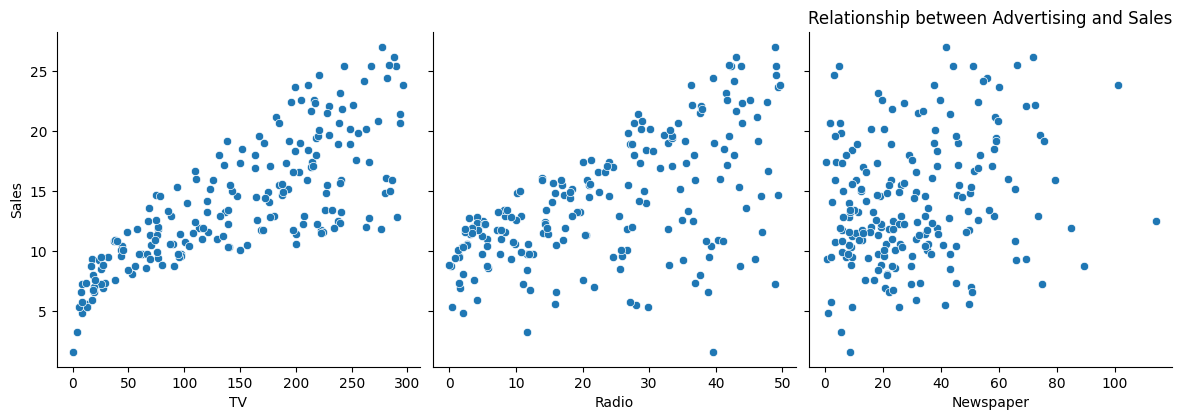

In [49]:
# Visualization - Relationships between variables
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.title("Relationship between Advertising and Sales")
plt.show()

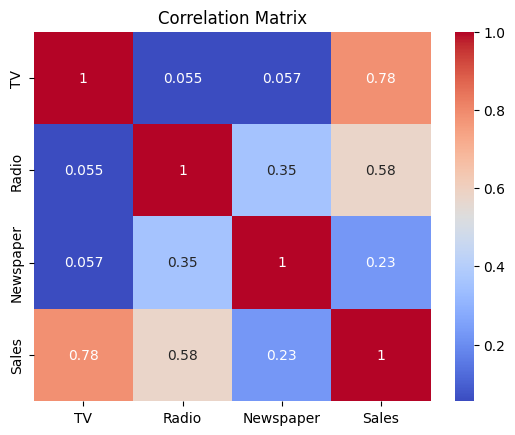

In [50]:
# Visualization - Correlation matrix
correlation_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

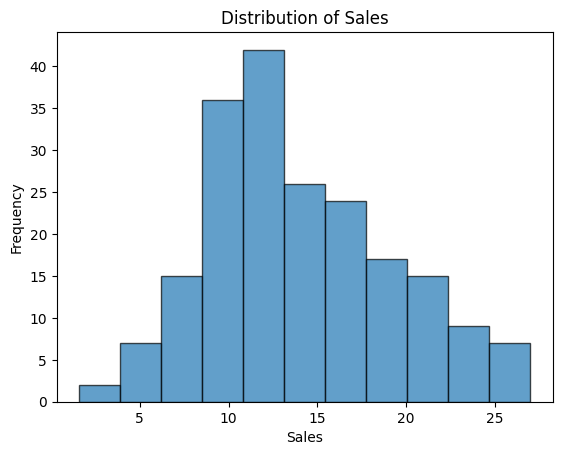

In [51]:
# Visualization - Distribution of Sales
plt.hist(data['Sales'], bins='auto', edgecolor='black', alpha=0.7)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [52]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Applying standard Scaling to scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Creating LinearRegression class object and fitting it. i.e. creating our model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [55]:
# Predicting the X_test_scaled
y_pred_linear = linear_reg.predict(X_test_scaled)
error_df = pd.DataFrame({'Y Predict': y_pred_linear, 'Y Test': y_test, 'Difference': y_pred_linear-y_test})
error_df


,Y Predict,Y Test,Difference
95,16.412277,16.9,-0.487723
15,20.843193,22.4,-1.556807
30,21.511869,21.4,0.111869
158,10.653100,7.3,3.353100
128,22.124058,24.7,-2.575942
115,13.123835,12.6,0.523835
69,21.037489,22.3,-1.262511
170,7.503854,8.4,-0.896146
174,13.647870,11.5,2.147870
45,15.120409,14.9,0.220409


In [56]:
# Checking MSE, MAE and r2 score on Linear model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE (with Scaling):", mse_linear)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Linear Regression MAE (with Scaling):", mae_linear)

r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression r2 (with Scaling):", r2_linear)

Linear Regression MSE (with Scaling): 3.199004468588902
Linear Regression MAE (with Scaling): 1.4650601050102927
Linear Regression r2 (with Scaling): 0.8986489151417081


In [57]:
# L1 Regularization (Lasso) with Scaling
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.01)

In [58]:
# Predicting the lasso on X_test_scaled
y_pred_lasso = lasso.predict(X_test_scaled)

In [59]:
# Checking MSE and MAE on Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE (with Scaling):", mse_lasso)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression MAE (with Scaling):", mae_lasso)

Lasso Regression MSE (with Scaling): 3.190899207839787
Lasso Regression MAE (with Scaling): 1.461928542759892


In [60]:
# L2 Regularization (Ridge) with Scaling
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)


Ridge(alpha=0.1)

In [61]:
# Predicting the Ridge on X_test_scaled
y_pred_ridge = ridge.predict(X_test_scaled)


In [62]:
# Checking MSE and MAE on Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE (with Scaling):", mse_ridge)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("Ridge Regression MAE (with Scaling):", mae_ridge)

Ridge Regression MSE (with Scaling): 3.2009542568023277
Ridge Regression MAE (with Scaling): 1.4654157989925967


In [63]:
# L3 Regularization (Elastic Net) with Scaling
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.1)

In [64]:
# Predicting the ElasticNet on X_test_scaled
y_pred_elastic = elastic_net.predict(X_test_scaled)


In [65]:
# Checking MSE and MAE on ElasticNet model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print("Elastic Net Regression MSE (with Scaling):", mse_elastic)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
print("Elastic Net Regression MAE (with Scaling):", mae_elastic)

Elastic Net Regression MSE (with Scaling): 3.405493146402484
Elastic Net Regression MAE (with Scaling): 1.5072993408392992


In [66]:
# Cross-Validation with Scaling
cv_scores_linear = cross_val_score(linear_reg, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lasso = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_elastic = cross_val_score(elastic_net,X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')


In [67]:
# Printing cross validation score for K-folds i.e. k=5 in this example
print("Cross-Validation Scores (Linear Regression with Scaling):", cv_scores_linear)
print("Cross-Validation Scores (Lasso Regression with Scaling):", cv_scores_lasso)
print("Cross-Validation Scores (Ridge Regression with Scaling):", cv_scores_ridge)
print("Cross-Validation Scores (Elastic Net Regression with Scaling):", cv_scores_elastic)

Cross-Validation Scores (Linear Regression with Scaling): [-4.20542549 -1.49963285 -2.10347838 -2.72072182 -4.36977824]
Cross-Validation Scores (Lasso Regression with Scaling): [-4.172799   -1.49995241 -2.12134115 -2.70255509 -4.3480859 ]
Cross-Validation Scores (Ridge Regression with Scaling): [-4.20081483 -1.50260463 -2.10627477 -2.72052614 -4.3677957 ]
Cross-Validation Scores (Elastic Net Regression with Scaling): [-3.89050893 -1.73885932 -2.443417   -2.78257596 -4.28807439]


In [68]:
# Taking mean of cross validation and printing it
import numpy as np
print("Linear Regression MSE after cross validation", np.mean(cv_scores_linear))
print("Lasso Regression MSE after cross validation", np.mean(cv_scores_lasso))
print("Ridge Regression MSE after cross validation", np.mean(cv_scores_ridge))
print("ElasticNet Regression MSE after cross validation", np.mean(cv_scores_elastic))

Linear Regression MSE after cross validation -2.979807356759569
Lasso Regression MSE after cross validation -2.968946708694717
Ridge Regression MSE after cross validation -2.979603214216639
ElasticNet Regression MSE after cross validation -3.028687120518339
